In [19]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [20]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [21]:
x_train = x_train/255
x_test = x_test/255


In [22]:
x_train_flattened= x_train.reshape(len(x_train),28*28)
x_test_flattened= x_test.reshape(len(x_test),28*28)
x_train_flattened.shape
x_test_flattened.shape

(10000, 784)

In [23]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_flattened , y_train, epochs=15,batch_size=32)

C:\Users\sooda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8726 - loss: 0.4605
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9611 - loss: 0.1341
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9730 - loss: 0.0906
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9805 - loss: 0.0661
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9845 - loss: 0.0522
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9884 - loss: 0.0397
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9901 - loss: 0.0337
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9923 - loss: 0.0259
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9937 - loss: 0.0209
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9946 - loss: 0.0194
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9949 - loss: 0.0166
Epoch 12/15
1875/1875 ━━━━━━━━

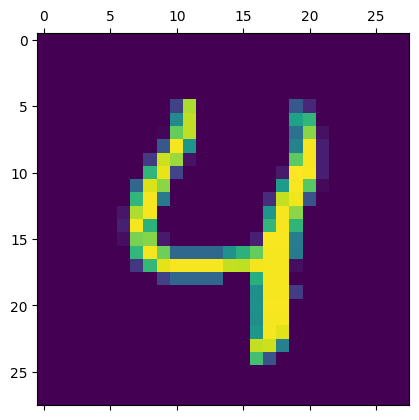

In [24]:
plt.matshow(x_test[4])

In [25]:
y_pred =model.predict(x_test_flattened)
y_pred[2]
np.argmax(y_pred[2])
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


[7, 2, 1, 0, 4]

Text(95.72222222222221, 0.5, 'Truth')

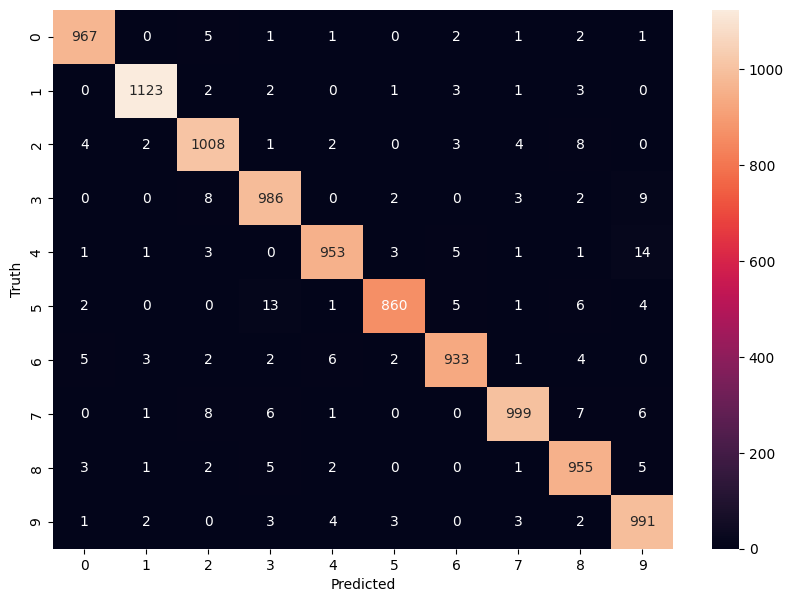

In [26]:
cm = tf.math.confusion_matrix(y_test,y_pred_labels)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')